## 第1章 统计学习方法概论

### 本章节在代码方面主要实现了：  
1.基于给定的数据，进行多项式的曲线拟合；  
2.对于高次的多项式可能会产生的过拟合情况，进行正则化处理

高斯于1823年在误差$e^1 ,… , e^n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！

### 一.使用最小二乘法拟和曲线

对于数据$(x_i, y_i)(i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时L2范数(残差平方和)最小时，h(x) 和 y 相似度最高，更拟合

一般的H(x)为n次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ 使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

这里准备模仿教材，选择目标函数为$y=sin2{\pi}x$加上一个正态分布的噪声干扰，并用多项式进行拟合（P11）

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
下面我们生成目标函数、多项式，并对比两者的差
'''

#生成目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

#生成需要拟合的多项式
def fit_func(p,x):
    f=np.poly1d(p)
    return f(x)

#计算目标函数和多项式的残差
def residuals_func(p,x,y):
    return fit_func(p,x)-y

*ps: numpy.poly1d([1,2,3])  生成  $f(x)=1x^2+2x^1+3x^0$*

In [3]:
'''
下面随机生成数据点
'''

#等间隔生成0-1之间的10个数字
x=np.linspace(0,1,10)

#等间隔生成0-1之间的1000个数字
x_points=np.linspace(0,1,1000)

#生成正弦曲线上的y值
y=real_func(x)

#下面加入噪声
y_=[np.random.normal(0,0.1)+ y1 for y1 in y]

In [4]:
'''
定义拟合函数,其中M为多项式的次数
'''
def fitting(M=0):
    #生成M+1个多项式的系数
    p_init=np.random.rand(M+1)

    #调用最小二乘法函数拟合最佳的多项式参数
    p_lsq=leastsq(residuals_func,p_init,args=(x,y_))
    print('拟合的参数：',p_lsq)
    
    #绘制实际函数曲线
    plt.plot(x_points,real_func(x_points),label='real_func')
    #绘制拟合的多项式曲线
    plt.plot(x_points,fit_func(p_lsq[0],x_points),label='fitted curve')
    #绘制噪声曲线
    plt.plot(x,y_,'bo',label='noise')
    #显示图例
    plt.legend()
    #返回正则化的参数
    return p_lsq

拟合的参数： (array([ 0.03164646]), 1)


(array([ 0.03164646]), 1)

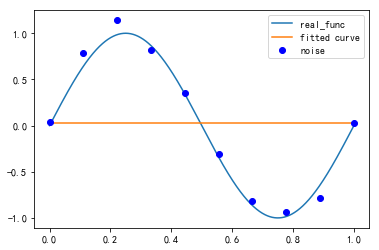

In [5]:
#拟合水平线
fitting(0)

拟合的参数： (array([-1.47723715,  0.77026503]), 1)


(array([-1.47723715,  0.77026503]), 1)

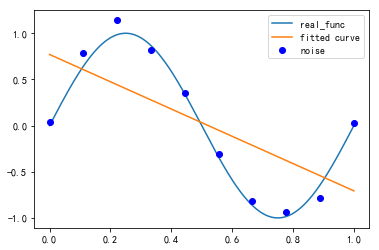

In [6]:
fitting(1)

拟合的参数： (array([  2.16013735e+01,  -3.23961043e+01,   1.08109219e+01,
         2.44332538e-02]), 1)


(array([  2.16013735e+01,  -3.23961043e+01,   1.08109219e+01,
          2.44332538e-02]), 1)

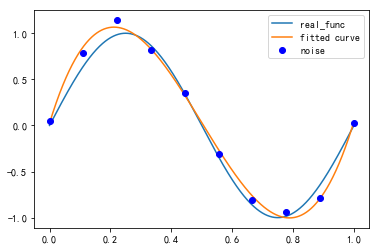

In [7]:
fitting(3)

拟合的参数： (array([ -1.25904609e+00,   2.41194659e+01,  -3.39660263e+01,
         1.11217977e+01,   1.61432076e-02]), 1)


(array([ -1.25904609e+00,   2.41194659e+01,  -3.39660263e+01,
          1.11217977e+01,   1.61432076e-02]), 1)

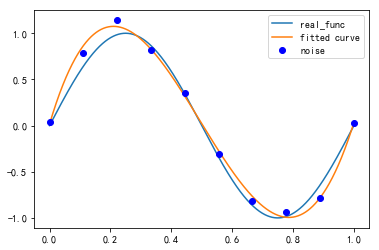

In [8]:
fitting(4)

拟合的参数： (array([ -8.60052373e+03,   4.12313974e+04,  -8.32397748e+04,
         9.19180471e+04,  -6.03239089e+04,   2.39033710e+04,
        -5.50826871e+03,   6.41231841e+02,  -2.15870979e+01,
         4.29081114e-02]), 2)


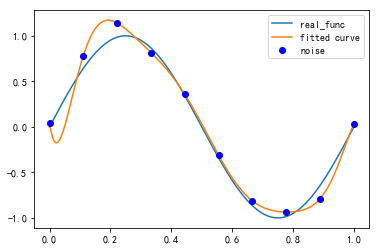

In [9]:
p_lsq_1=fitting(9)

### 二.正则化

从以上结果看出，多项式较为完美的拟合了正弦曲线，但是对于后期未知的数据可能存在过拟合的情况，固考虑引入正则化项(regularizer)，降低过拟合:  
$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [10]:
'''
定义加入正则项的残差函数
'''
#这里设定正则化项的关系系数为0.0001
regularization=0.0001

def residuals_func_regularization(p,x,y):
    #这里的ret代表的是拟合函数和原数据y之间的误差，自然是越小越好
    ret=fit_func(p,x)-y
    
    #ret=residuals_func(p,x,y)
    #加入正则化项，正则化项表征模型的复杂程度，显然模型当前拟合效果越好，也越容易过拟合，因此正则项不宜过大
    ret=np.append(ret,np.sqrt(0.5*regularization*np.square(p)))
    
    return ret

In [11]:
p_init=np.random.rand(10)

#进行正则化后，再进行最小二乘法匹配，结果会综合考虑函数与原数据残差（最小），且保证模型不宜过于复杂
p_lsq_regularization =leastsq(residuals_func_regularization,p_init,args=(x,y_))

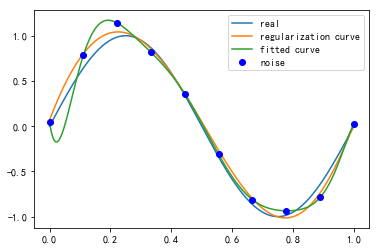

In [13]:
'''
绘制图像进行对比
'''
plt.plot(x_points,real_func(x_points),label='real')
plt.plot(x_points,fit_func(p_lsq_regularization[0],x_points),label='regularization curve')
plt.plot(x_points,fit_func(p_lsq_1[0],x_points),label='fitted curve')
plt.plot(x,y_,'bo',label='noise')
plt.legend()